Draw H line
Move multiply by drawn Re
Adjust to desired Re
Normalize to Re
Draw color profile

### Draw H

In [6]:
# adds parent dir to python path
import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import numpy as np

import gphelper as gp

/home/ryanhausen/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:339: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


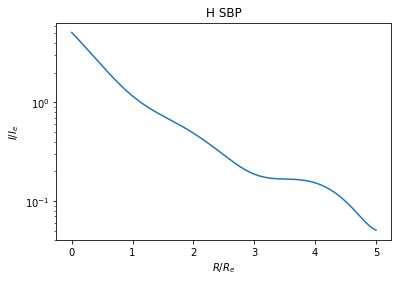

In [30]:
h_model = gp.GPHelper(restore_file='./gp-models/gp_h.json')
x = np.linspace(0.001, 5, 500)[:, np.newaxis]
h_line = h_model.sample(x)

plt.title('H SBP')
plt.ylabel('$I/I_e$')
plt.xlabel('$R/R_e$')
plt.semilogy(x, h_line)
plt.show()

RE:1.8443186372745488


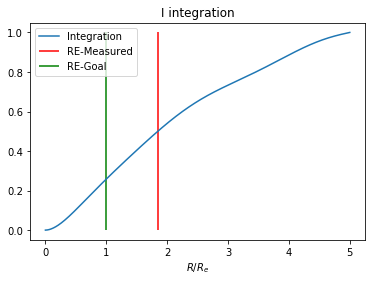

In [38]:
x = x.flatten()
delta_x = np.diff(x)[0]/2
xs = [np.pi*((_x+delta_x)**2-(_x-delta_x)**2) for _x in x.flatten()]
xs = np.array(xs)[:, np.newaxis]

rad_h = xs*h_line
I_tot = (rad_h).sum()
int_I = np.cumsum(rad_h/I_tot)
re_idx = np.square(int_I-0.5).argmin()
h_re = x[re_idx]

print(f'Re:{h_re}')
plt.title('I integration')
plt.xlabel('$R/R_e$')
plt.plot(x, int_I, label='Integration')
plt.vlines(h_re, 0, 1, color='r', label='RE-Measured')
plt.vlines(1, 0, 1, color='g', label='RE-Goal')
plt.legend()
plt.show()

### Get Attributes from Distribution

In [8]:
import DataTools as dt

Drawn Re:0.24 Ie:0.03402267889416052


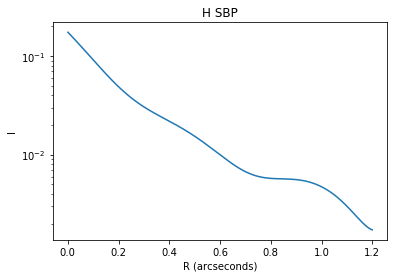

In [44]:
re = dt.get_param_from_dist('spheroid', 're')
ie = dt.get_param_from_dist('spheroid', 'ie')

r = x * re
f = h_line * ie

print(f'Drawn Re:{re} Ie:{ie}')
plt.title('H SBP')
plt.xlabel('R (arcseconds)')
plt.ylabel('I')
plt.semilogy(r, f)
plt.show()

Re:0.4426364729458917
Re ratio:1.8443186372745488


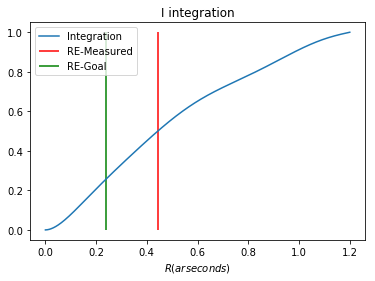

In [50]:
r = r.flatten()
delta_r = np.diff(r)[0]/2
rs = [np.pi*((_r+delta_r)**2-(_r-delta_r)**2) for _r in r.flatten()]
rs = np.array(rs)[:, np.newaxis]

rf = rs*f
I_tot = rf.sum()
int_I = np.cumsum(rf/I_tot)
re_idx = np.square(int_I-0.5).argmin()
measured_re = r[re_idx]

print(f'Re:{measured_re}')
print(f'Re ratio:{measured_re/re}')
plt.title('I integration')
plt.xlabel('$R (arseconds)$')
plt.plot(r, int_I, label='Integration')
plt.vlines(measured_re, 0, 1, color='r', label='RE-Measured')
plt.vlines(re, 0, 1, color='g', label='RE-Goal')
plt.legend()
plt.show()

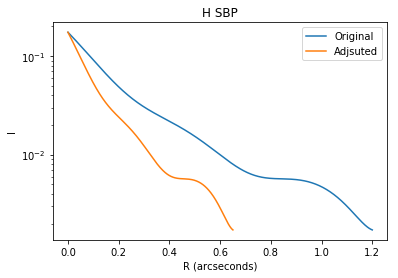

In [49]:
# adjust the line in R to have the right Re
adj_r = r / (measured_re/re)

plt.title('H SBP')
plt.xlabel('R (arcseconds)')
plt.ylabel('I')
plt.semilogy(r, f, label='Original')
plt.semilogy(adj_r, f, label='Adjsuted')
plt.legend()
plt.show()

Re:0.24


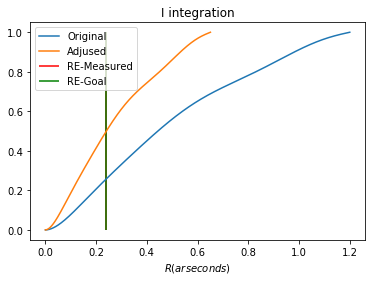

In [51]:
adj_r = adj_r.flatten()
delta_r = np.diff(adj_r)[0]/2
adj_rs = [np.pi*((_r+delta_r)**2-(_r-delta_r)**2) for _r in adj_r.flatten()]
adj_rs = np.array(adj_rs)[:, np.newaxis]

adj_rf = adj_rs*f
I_tot = adj_rf.sum()
adj_int_I = np.cumsum(adj_rf/I_tot)
re_idx = np.square(int_I-0.5).argmin()
adj_measured_re = adj_r[re_idx]

print(f'Re:{adj_measured_re}')
plt.title('I integration')
plt.xlabel('$R (arseconds)$')
plt.plot(r, int_I, label='Original')
plt.plot(adj_r, adj_int_I, label='Adjused')
plt.vlines(adj_measured_re, 0, 1, color='r', label='RE-Measured')
plt.vlines(re, 0, 1, color='g', label='RE-Goal')
plt.legend()
plt.show()

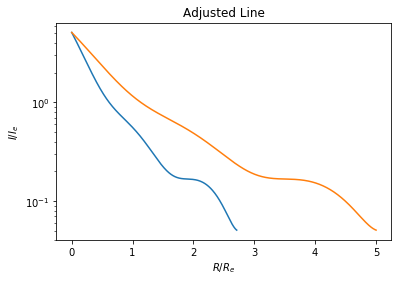

In [53]:
# Move line back into R/RE space I/Ie space
new_r = adj_r/re
new_f = f/ie

plt.title('Adjusted Line')
plt.xlabel('$R/R_e$')
plt.ylabel('$I/I_e$')
plt.semilogy(new_r, new_f, label='Modified Line')
plt.semilogy(x, h_line, label='Orignal Draw')
plt.show()

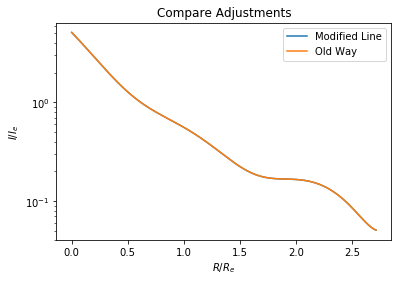

In [57]:
plt.title('Compare Adjustments')
plt.xlabel('$R/R_e$')
plt.ylabel('$I/I_e$')
plt.semilogy(new_r, new_f, label='Modified Line')
plt.semilogy(x/1.8443186372745488, h_line, label='Old Way')
plt.legend()
plt.show()

Need to move the line 0.25890523595541975


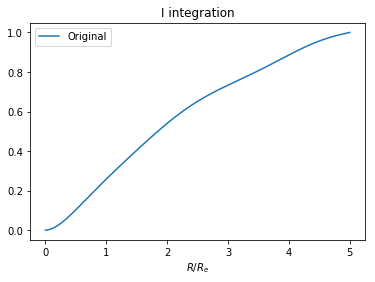

In [93]:
x = x.flatten()
delta_x = np.diff(x)[0]/2
xs = [np.pi*((_x+delta_x)**2-(_x-delta_x)**2) for _x in x.flatten()]
xs = np.array(xs)[:, np.newaxis]

rad_h = xs*h_line
I_tot = (rad_h).sum()
int_I = np.cumsum(rad_h/I_tot)
re_idx = np.square(int_I-0.5).argmin()
I_Ie = int_I[np.square(x-1).argmin()]
print(f'Need to move the line {I_Ie}')

plt.title('I integration')
plt.xlabel('$R/R_e$')
plt.plot(x, int_I, label='Original')
plt.legend()
plt.show()

In [66]:
def delta_l(x, diff):
    return diff - diff * (1-x)**2
    
def delta_r(x, diff):
    return diff - diff * ((x-1)/(x.max()-1))**2
    
eta = np.zeros_like(x)
eta[x<=1] = delta_l(x[x<=1], I_Ie)
eta[x>1] = delta_r(x[x>1], I_Ie)

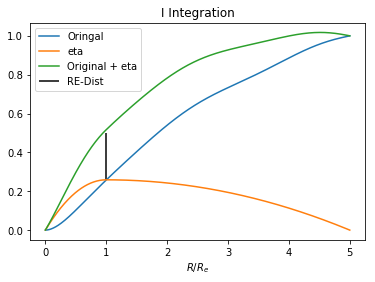

In [72]:
plt.title('I Integration')
plt.xlabel('$R/R_e$')
plt.plot(x, int_I, label='Oringal')
plt.plot(x, eta, label='eta')
plt.plot(x, int_I+eta, label='Original + eta')
plt.vlines(1, I_Ie, 0.5, label='RE-Dist')
plt.legend()
plt.show()

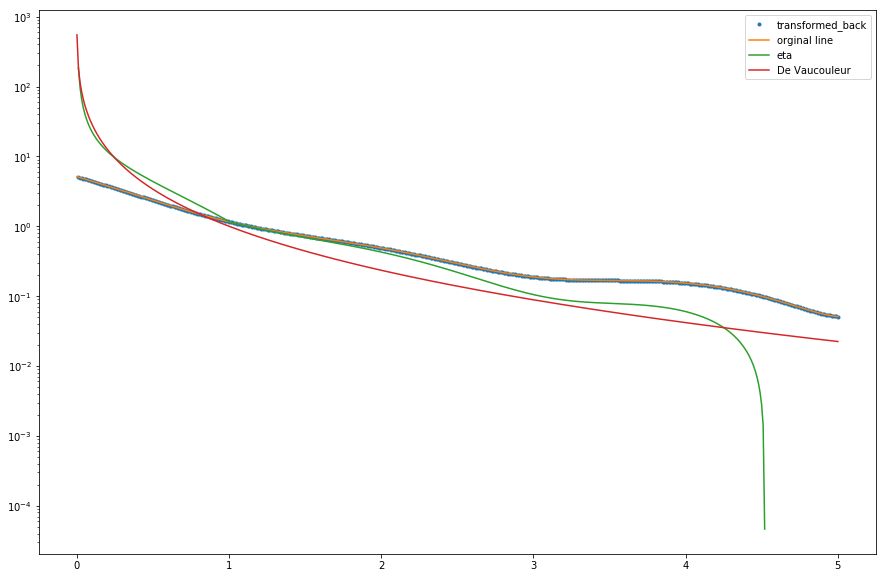

In [100]:
# make a sersic profile
# https://ned.ipac.caltech.edu/level5/March05/Graham/Graham2.html
def b(n):
    return 1.9992*n-0.3271

def I(r):
    """Assuming that I_e=1.0 and that R_e=1.0"""
    n = 4
    return np.exp(-b(n) * (np.power(r, 1/n)  - 1))

r = np.linspace(0.001, 5, 500)
f = I(x) 


d = np.array([0] + np.diff(int_I).tolist())*I_tot/xs[:,0]
d_eta = np.array([0] + np.diff(int_I+eta).tolist())*I_tot/xs[:,0]

plt.figure(figsize=(15,10))
plt.ylabel('$I/I_e$')
plt.ylabel('$R/R_e$')
plt.semilogy(x, d, '.', label='transformed_back')
plt.semilogy(x, h_line, label='orginal line')
plt.semilogy(x, d_eta, label='eta')
plt.semilogy(x, f, label='De Vaucouleur')
plt.legend()
plt.show()

Value at 0.9426953907815631: 0.4984778953129939
True


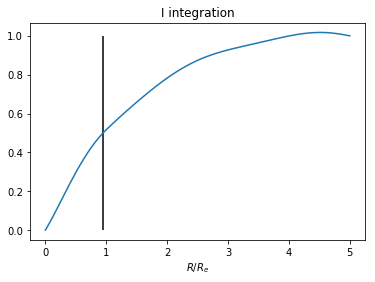

In [115]:
rad_eta = xs[:,0]*d_eta
I_tot = (rad_eta).sum()
int_I_eta = np.cumsum(rad_eta/I_tot)
re_idx = np.square(int_I_eta-0.5).argmin()
I_Ie = int_I_eta[re_idx]
print(f'Value at {x[re_idx]}: {I_Ie}')

plt.title('I integration')
plt.xlabel('$R/R_e$')
plt.plot(x, int_I_eta)
plt.vlines(x[re_idx], 0, 1)
plt.show()